In [1]:
import numpy as np
import sys
import json
import time
import datetime

#NN Surrogate model class
from injector_surrogate_quads import *

from sampling_functions import get_ground_truth, get_beamsize
from emittance_calc import *
sys.path.append('../configs')
#Sim reference point to optimize around
from ref_config import ref_point

import matplotlib.pyplot as plt

## Load inj model

In [2]:
Model = Surrogate_NN()

Model.load_saved_model(model_path = '../models/', \
                       model_name = 'model_OTR2_NA_rms_emit_elu_2021-07-27T19_54_57-07_00')
Model.load_scaling()
Model.take_log_out = False

## Set up beam size function: get_sizes()

In [3]:
energy = 0.135

In [3]:
# this has to match beam_io.py fn....
def get_sizes(quad):
    return get_beamsize(Model, ref_point, 0.4657 , -0.007063 ,-0.01989  , quad)

## Finding emittance

Next:
- uncertainty

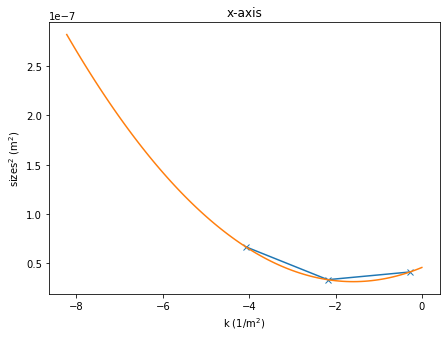

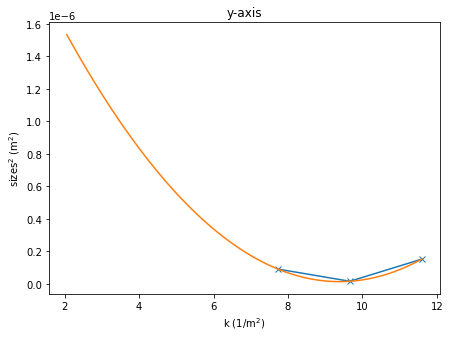

nemitx: 6.39, nemity: 8.93
bmagx: 2.92, bmagy: 8.37


In [4]:
init_range =  [-4, -3, -1] 

x_sizes = np.array([get_sizes(x)[0] for x in init_range])
y_sizes = np.array([get_sizes(x)[1] for x in init_range])

get_normemit(0.135, init_range, init_range, x_sizes, y_sizes, adapt_ranges=True, num_points=3, show_plots=True);

# test w/ diff scan

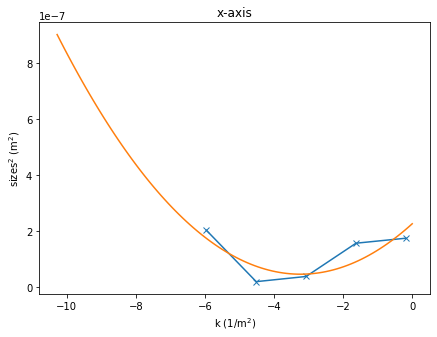

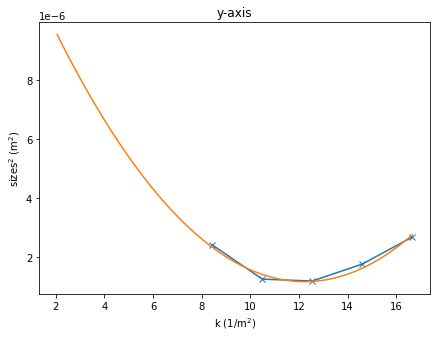

nemitx: 13.29, nemity: 147.85
bmagx: 5.01, bmagy: 2.21


(1.3287959890283092e-05,
 0.00014785399141393094,
 5.0143403890407505,
 2.208334115847226)

In [7]:
def get_sizes(quad):
    return get_beamsize(Model, ref_point, 0.5657 , -0.01063 ,-0.01  , quad)

init_range =  [-5, -3, -1] 

x_sizes = np.array([get_sizes(x)[0] for x in init_range])
y_sizes = np.array([get_sizes(x)[1] for x in init_range])

get_normemit(0.135, init_range, init_range, x_sizes, y_sizes, adapt_ranges=True, num_points=5, show_plots=True)